In [1186]:
import numpy as np
from numpy import size
import h5py
import matplotlib.pyplot as plt

In [1187]:
#Load the training dataset

trainset = "datasets/train_catvnoncat.h5"
testset = "datasets/test_catvnoncat.h5"

with h5py.File(trainset, 'r') as hdf:
    train_set_x_orig = np.array(hdf['train_set_x'][:], dtype=np.float64) 
    train_set_y = np.array(hdf['train_set_y'][:], dtype=np.float64)
train_set_y = train_set_y.reshape(1, 209)

num_px = 64
m_train = train_set_x_orig.shape[0]             #Number of images in the dataset

def sigmoid(z):
    return 1/(1 + np.exp(-z))

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T/255.0
train_set_x_flatten = np.vstack((train_set_x_flatten, np.ones((1, m_train))))   #Adds a 1(one's) row for the image

def isok(a,idx):
    return bool(bool(a>0.5)==(train_set_y[0][idx].astype(bool)))

def calculate_accuracy_2(A,Y):
    predictions = (A > 0.5).astype(float)           #vector operations accelerate convergence
    return np.mean(predictions == Y)

In [1188]:
with h5py.File(testset, 'r') as hdf:
    test_set_x_orig = np.array(hdf['test_set_x'][:], dtype=np.float64)
    test_set_y = np.array(hdf['test_set_y'][:], dtype=np.float64).reshape(1, -1)
m_test = test_set_x_orig.shape[0] 

num_px = test_set_x_orig.shape[1] 

test_set_x_flatten_test = test_set_x_orig.reshape(m_test, -1).T / 255.0
test_set_x_flatten_test = np.vstack((test_set_x_flatten_test, np.ones((1, test_set_x_flatten_test.shape[1]))))  # Add bias



## Creating layers and weights:

In [1189]:
np.random.seed(1)
hidden_size = 32
W= np.random.randn(1,int(hidden_size)) * 0.01
print(W.shape)
V = np.random.randn(int(hidden_size),train_set_x_flatten.shape[0]) *0.01 # Hidden layer weights
print(V.shape)

(1, 32)
(32, 12289)


### Foward propagation

In [1190]:
""" hidden_layer = np.dot(hidden_matrix.T,train_set_x_flatten)
H = sigmoid(hidden_layer)
print(H.shape)

out = np.dot(weight_matrix.T,H)
A = sigmoid(out)
print(A.shape) """

' hidden_layer = np.dot(hidden_matrix.T,train_set_x_flatten)\nH = sigmoid(hidden_layer)\nprint(H.shape)\n\nout = np.dot(weight_matrix.T,H)\nA = sigmoid(out)\nprint(A.shape) '

### Backpropagation

In [1191]:
""" alfa = 0.01
dZ = A - train_set_y
print(train_set_y.shape)

dW = -alfa * np.dot(H,dZ.T) """

' alfa = 0.01\ndZ = A - train_set_y\nprint(train_set_y.shape)\n\ndW = -alfa * np.dot(H,dZ.T) '

In [1192]:
""" print(dZ.shape)
dhidden_aux = np.dot(weight_matrix, dZ) * H * (1 - H)

d_hidden = -alfa * np.dot(dhidden_aux, train_set_x_flatten.T)
print(hidden_matrix.shape)
print(d_hidden.shape) """

' print(dZ.shape)\ndhidden_aux = np.dot(weight_matrix, dZ) * H * (1 - H)\n\nd_hidden = -alfa * np.dot(dhidden_aux, train_set_x_flatten.T)\nprint(hidden_matrix.shape)\nprint(d_hidden.shape) '

### Update param

In [1193]:
#hidden_matrix = hidden_matrix + d_hidden.T
#weight_matrix = weight_matrix + dW
print(train_set_x_flatten.shape[1])

209


## Full routine:

Iteration 0: Training Accuracy = 0.3445
Iteration 100: Training Accuracy = 0.6555
Iteration 200: Training Accuracy = 0.6555
Iteration 300: Training Accuracy = 0.6794
Iteration 400: Training Accuracy = 0.7703
Iteration 500: Training Accuracy = 0.8325
Iteration 600: Training Accuracy = 0.8804
Iteration 700: Training Accuracy = 0.8756
Iteration 800: Training Accuracy = 0.8852
Iteration 900: Training Accuracy = 0.8995
Iteration 1000: Training Accuracy = 0.9330
Iteration 1100: Training Accuracy = 0.9522
Iteration 1200: Training Accuracy = 0.9330
Iteration 1300: Training Accuracy = 0.9809
Iteration 1400: Training Accuracy = 0.9809


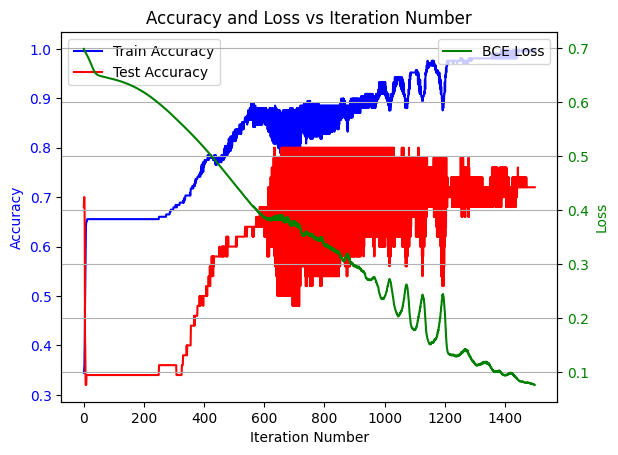

Test Accuracy: 0.7200 iteration:  1499


In [ ]:
alpha = 0.01
acc_vec = []
acc_vec_train = []
loss_vec = []

for i in range(1500):
    # Forward pass
    Z1 = V @ train_set_x_flatten  # Linear transformation for hidden layer
    H = np.maximum(0, Z1)  # ReLU activation
    Z2 = W @ H       # Linear transformation for output layer
    A2 = sigmoid(Z2)   # Sigmoid activation
    
    train_acc = calculate_accuracy_2(A2,train_set_y)
    acc_vec_train.append(train_acc)

    # Backward pass
    dZ2 = A2 - train_set_y  # Gradient of loss w.r.t. output layer linear transformation
    dW = (1 / train_set_x_flatten.shape[1]) * dZ2 @ H.T  # Gradient of loss w.r.t. output layer weights
    
    dA1 = W.T @ dZ2  # Gradient of loss w.r.t. hidden layer activations
    dZ1 = dA1 * (Z1 > 0)  # Gradient of loss w.r.t. hidden layer linear transformation (ReLU derivative)
    dV = (1 / train_set_x_flatten.shape[1]) * dZ1 @ train_set_x_flatten.T  # Gradient of loss w.r.t. hidden layer weights
    
    # Update weights
    V -= alpha * dV
    W -= alpha * dW

    Z1test = V @ test_set_x_flatten_test      # (hidden_size, m_train)
    Htest = np.maximum(0, Z1test)              # ReLU activation
    Z2test = W @ Htest                        # (1, m_train)
    A_test = sigmoid(Z2test)

    test_acc = calculate_accuracy_2(A_test,test_set_y)
    acc_vec.append(test_acc)

    #if(test_acc >= 0.80 and i>720): 
    #    print(f"Test Accuracy: {test_acc:.4f}","iteration: ",i)
    #    break

    # Compute BCE loss (add epsilon to avoid log(0))
    epsilon = 1e-9
    loss = -np.mean(train_set_y * np.log(A2 + epsilon) + (1 - train_set_y) * np.log(1 - A2 + epsilon))
    loss_vec.append(loss)
    
    # Monitor accuracy
    if i % 100 == 0:
        accuracy = calculate_accuracy_2(A2, train_set_y)
        print(f"Iteration {i}: Training Accuracy = {accuracy:.4f}")

# Plotting with twin axes
plt.figure()
ax1 = plt.gca()
ax1.plot(range(len(acc_vec_train)), acc_vec_train, 'b-', label='Train Accuracy')
ax1.plot(range(len(acc_vec)), acc_vec, 'r-', label='Test Accuracy')
ax1.set_xlabel('Iteration Number')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(range(len(loss_vec)), loss_vec, 'g-', label='BCE Loss')
ax2.set_ylabel('Loss', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

plt.title('Accuracy and Loss vs Iteration Number')
plt.grid(True)
plt.show()

print(f"Test Accuracy: {test_acc:.4f}","iteration: ",i)

In [1195]:
# Append 1's for bias
#test_set_x_flatten_test = np.vstack([test_set_x_flatten_test, np.ones((1, m_test))])

print("Shape of test_set_x_flatten:", test_set_x_flatten_test.shape) 
print("Shape of test_set_y:", test_set_y.shape)  

Shape of test_set_x_flatten: (12289, 50)
Shape of test_set_y: (1, 50)


In [1196]:
Z1test = V @ test_set_x_flatten_test      # (hidden_size, m_train)
print(Z1test.shape)
Htest = np.maximum(0, Z1test)              # ReLU activation
print(Htest.shape)
Z2test = W @ Htest                        # (1, m_train)
print(Z2test.shape)
A_test = sigmoid(Z2test)

print(A_test.shape)

print(f"Test Accuracy: {calculate_accuracy_2(A_test,test_set_y):.4f}")

(32, 50)
(32, 50)
(1, 50)
(1, 50)
Test Accuracy: 0.7200


# Now Memres

In [1197]:
def conductance_calc(w, Gmax=110E-6):

    max_w = np.max(np.abs(w))
    scale_factor = Gmax / max_w
    
    Gplus_unclipped  = (w > 0) * (w * scale_factor)
    Gminus_unclipped = (w < 0) * (-w * scale_factor)
    
    Gplus  = np.clip(Gplus_unclipped,  0, Gmax)
    Gminus = np.clip(Gminus_unclipped, 0, Gmax)

    
    return Gplus, Gminus

def memres_inf(x, Gplus_H, Gminus_H, Gplus_W, Gminus_W):
    I_out_1  = np.dot((Gplus_H-Gminus_H),x)
    
    A_1 = np.maximum(0, I_out_1)  # ReLU activation

    I_out_2 = np.dot((Gplus_W-Gminus_W),A_1)

    A_2 = 1.0/(1.0 + np.exp(-I_out_2))


    return A_2    

Gplus_noise_free_H, Gminus_noise_free_H = conductance_calc(V, Gmax=110E-6)
Gplus_noise_free_W, Gminus_noise_free_W = conductance_calc(W, Gmax=110E-6)


print(np.max(Gminus_noise_free_H) * 1e6)
print(np.max(Gminus_noise_free_W) * 1e6)


A_out = memres_inf(test_set_x_flatten_test, Gplus_noise_free_H, Gminus_noise_free_H,Gplus_noise_free_W,Gminus_noise_free_W)

print(calculate_accuracy_2(A_out,test_set_y))

110.0
110.0
0.72


#### Max Noise LIN

(32, 12289)


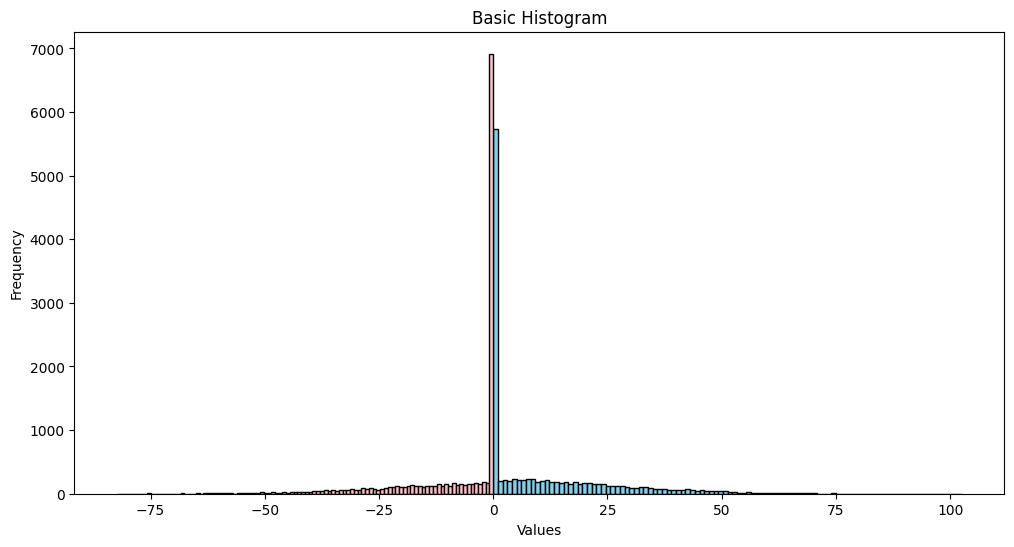

In [1198]:
plt.figure(figsize=(12, 6))
plt.hist(Gplus_noise_free_H[0]*1e6, bins=100, color='skyblue', edgecolor='black')
plt.hist(Gminus_noise_free_H[0]*-1*1e6, bins=100, color='pink', edgecolor='black')
print(Gplus_noise_free_H.shape)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

In [1199]:
def noise_adding(sigma,Gplus,Gminus):
    Gplus_cpy = np.copy(Gplus)
    Gminus_cpy = np.copy(Gminus)
    
    Gplus_cpy, Gminus_cpy = (Gplus > 0) * (Gplus + np.random.normal(0,sigma,Gplus.shape)), (Gminus > 0) * (Gminus + np.random.normal(0,sigma,Gplus.shape))
    
    return  np.clip(Gplus_cpy,  0, 110E-6),np.clip(Gminus_cpy,  0, 110E-6)

0.72


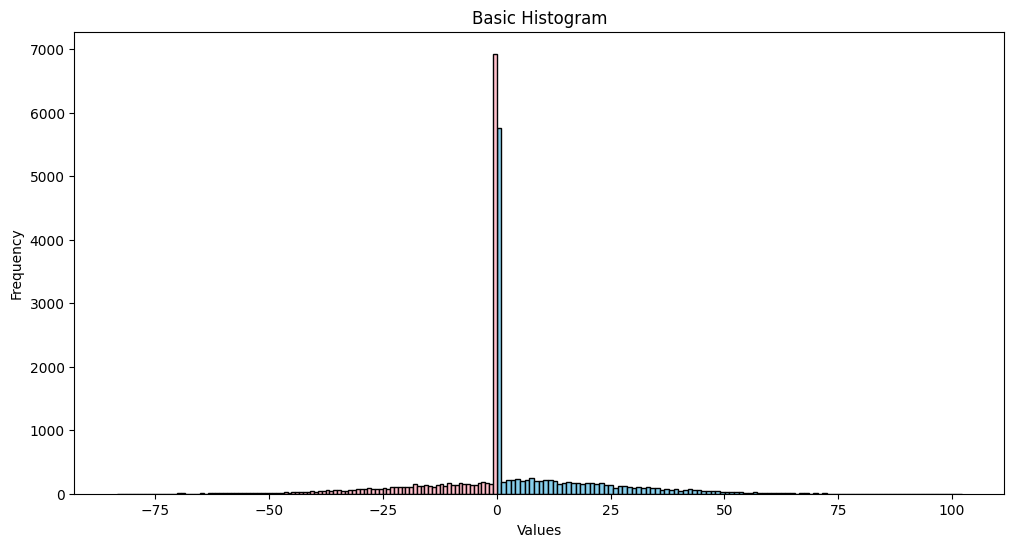

In [1200]:
sigma = 1E-6    

Gplus_H, Gminus_H = noise_adding(sigma,Gplus_noise_free_H,Gminus_noise_free_H)
Gplus_W, Gminus_W = noise_adding(sigma,Gplus_noise_free_W,Gminus_noise_free_W)

A_out = memres_inf(test_set_x_flatten_test, Gplus_H, Gminus_H,Gplus_W,Gminus_W)
plt.figure(figsize=(12, 6))
print(calculate_accuracy_2(A_out,test_set_y))
plt.hist(Gplus_H[0]*1e6, bins=100, color='skyblue', edgecolor='black')
plt.hist(Gminus_H[0]*-1*1e6, bins=100, color='pink', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

0.72


(1, 32)


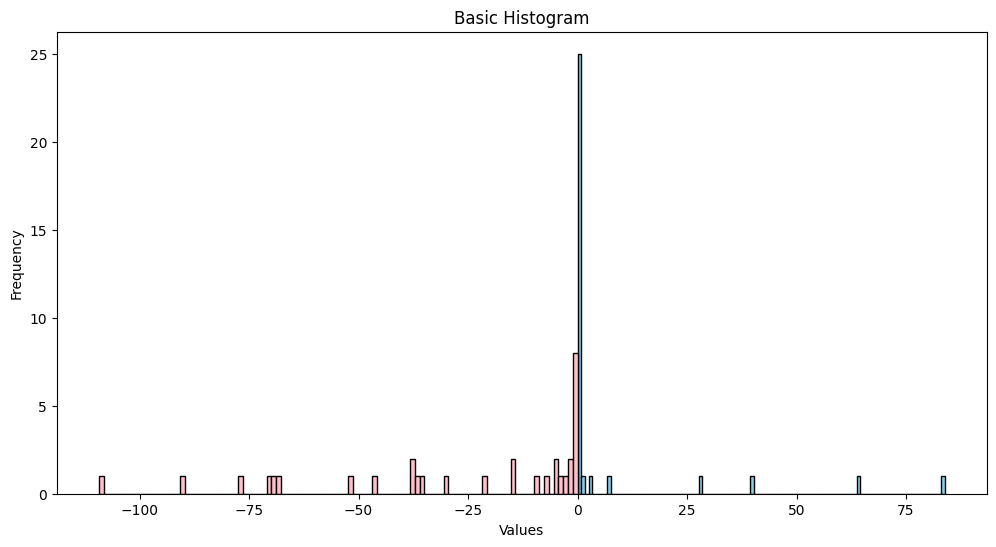

In [1201]:
plt.figure(figsize=(12, 6))
print(calculate_accuracy_2(A_out,test_set_y))
plt.hist(Gplus_W[0]*1e6, bins=100, color='skyblue', edgecolor='black')
plt.hist(Gminus_W[0]*-1*1e6, bins=100, color='pink', edgecolor='black')

print(Gminus_W.shape)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

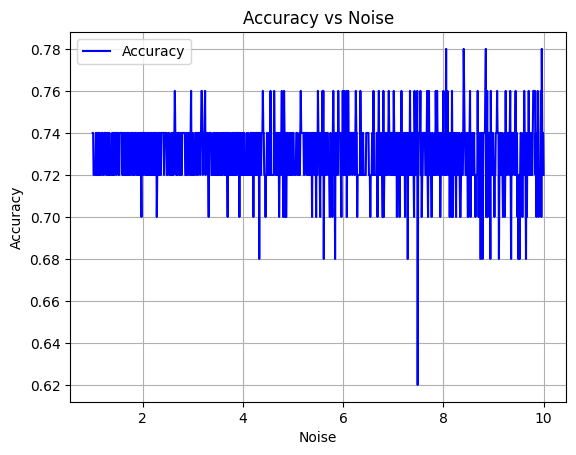

In [1202]:
import numpy as np
from joblib import Parallel, delayed
import matplotlib.pyplot as plt

def process_iteration(i, noise_value, Gplus_noise_free_H, Gminus_noise_free_H,
                    Gplus_noise_free_W, Gminus_noise_free_W,
                    test_set_x_flatten_test, test_set_y):
    # Add noise and calculate accuracy for one noise value
    Gplus_noisy_H, Gminus_noisy_H = noise_adding(noise_value, Gplus_noise_free_H, Gminus_noise_free_H)
    Gplus_noisy_W, Gminus_noisy_W = noise_adding(noise_value, Gplus_noise_free_W, Gminus_noise_free_W)
    
    # Calculate inference output and accuracy
    A_out = memres_inf(test_set_x_flatten_test, Gplus_noisy_H, Gminus_noisy_H,
                      Gplus_noisy_W, Gminus_noisy_W)
    
    # Progress tracking
    if i % 100 == 0:
        print(f"Step: {i}")
    
    return calculate_accuracy_2(A_out, test_set_y)

def parallel_accuracy_calc(Gplus_noise_free_H, Gminus_noise_free_H,
                          Gplus_noise_free_W, Gminus_noise_free_W,
                          test_set_x_flatten_test, test_set_y, n_jobs=-1):
    # Define noise vector
    noise_vec = np.linspace(1E-6, 10E-6, int(1E+3))
    
    # Parallel processing
    acc_vec = Parallel(n_jobs=n_jobs, verbose=0)(
        delayed(process_iteration)(
            i, noise_vec[i], Gplus_noise_free_H, Gminus_noise_free_H,
            Gplus_noise_free_W, Gminus_noise_free_W,
            test_set_x_flatten_test, test_set_y
        ) for i in range(len(noise_vec))
    )
    
    # Convert to numpy array
    acc_vec = np.array(acc_vec)
    
    # Plotting
    plt.plot(noise_vec*1e6, acc_vec, linestyle='-', color='b', label='Accuracy')
    plt.xlabel('Noise')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Noise')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return noise_vec, acc_vec

# Usage example:
if __name__ == '__main__':
    # Assuming these variables are defined elsewhere
    # Gplus_noise_free_H, Gminus_noise_free_H, Gplus_noise_free_W, 
    # Gminus_noise_free_W = conductance_calc(weight_matrix, Gmax=110e-6)
    
    noise_vec, acc_vec = parallel_accuracy_calc(
        Gplus_noise_free_H, Gminus_noise_free_H,
        Gplus_noise_free_W, Gminus_noise_free_W,
        test_set_x_flatten_test, test_set_y
    )

(32, 12289)


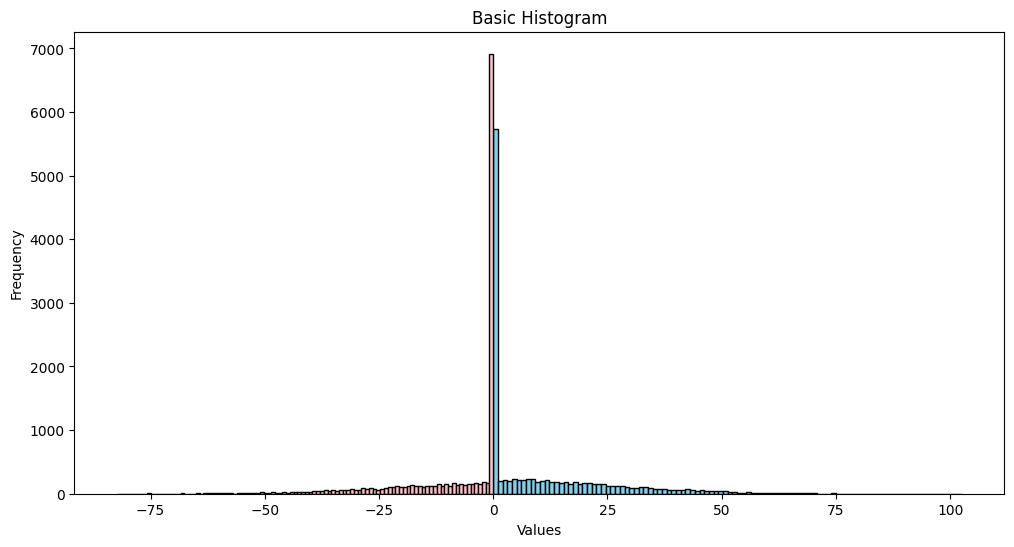

In [1203]:
plt.figure(figsize=(12, 6))
plt.hist(Gplus_noise_free_H[0]*1e6, bins=100, color='skyblue', edgecolor='black')
plt.hist(Gminus_noise_free_H[0]*-1*1e6, bins=100, color='pink', edgecolor='black')
print(Gplus_noise_free_H.shape)

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

# Hardware aware noise

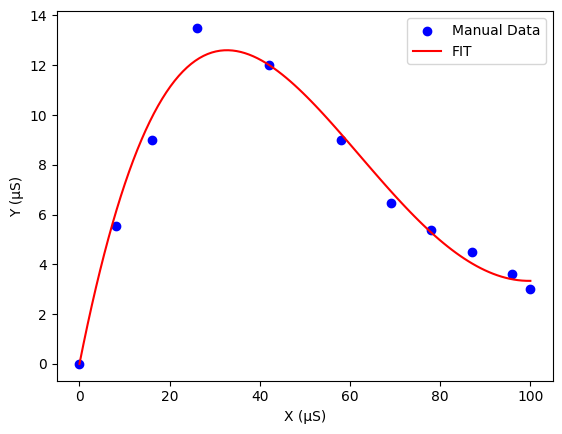

0.0


In [1204]:
x = [0,8,16,26,42,58,69,78,87,96,100]
y = [0,3.7,6,9,8,6,4.3,3.6,3,2.4,2]

#x = [0,8,16,26,42,58,69,78,87,96,100]
#y = [16,12.5,11,9,8,6,4.3,3.6,3,2.4,2]


x = np.multiply(x, 1E-6)
y = np.multiply(y, 1E-6)
y = np.multiply(y, 1.5)

# Fit polynomial without constant term (y = a x^4 + b x^3 + c x^2 + d x)
A = np.column_stack([x**4, x**3, x**2, x])  # Design matrix
coeffs, _, _, _ = np.linalg.lstsq(A, y, rcond=None)


# Create polynomial function with a zero constant term
poly_coeffs = np.concatenate([coeffs, [0]])  # Adds the 0 coefficient for x^0
poly_func = np.poly1d(poly_coeffs)

x_fit = np.linspace(np.min(x),np.max(x),size(x)*10)
y_fit = poly_func(x_fit)

plt.scatter(x*1E6, y*1E6, color='blue', label='Manual Data')
plt.plot(x_fit*1E6, y_fit*1E6, color='red', label=f'FIT')
plt.xlabel("X (µS)")
plt.ylabel("Y (µS)")
plt.legend()
plt.show()
print(poly_func(0))

In [1205]:
def noise_adding_fit(Gplus, Gminus):
    # Create copies of the input arrays
    Gplus_copy = np.copy(Gplus)
    Gminus_copy = np.copy(Gminus)
    
    for i in range(Gplus_copy.shape[1]):
        # Add noise to the copies
        Gplus_copy[0][i] = Gplus_copy[0][i] + np.random.normal(0, poly_func(Gplus_copy[0][i]))
        Gminus_copy[0][i] = Gminus_copy[0][i] + np.random.normal(0, poly_func(Gminus_copy[0][i]))
    
    # Return the modified copies
    return Gplus_copy, Gminus_copy
    #np.random.normal (mean,std_dev,size)


In [1206]:
#add noise
Gplus_noisy_fit_W, Gminus_noisy_fit_W = noise_adding_fit(Gplus_noise_free_W,Gminus_noise_free_W)
Gplus_noisy_fit_H, Gminus_noisy_fit_H = noise_adding_fit(Gplus_noise_free_H,Gminus_noise_free_H)


Gplus_noisy_fit_H = np.clip(Gplus_noisy_fit_H,0,110e-6)
Gminus_noisy_fit_H = np.clip(Gminus_noisy_fit_H,0,110e-6)


Gplus_noisy_fit_W = np.clip(Gplus_noisy_fit_W,0,110e-6)
Gminus_noisy_fit_W = np.clip(Gminus_noisy_fit_W,0,110e-6)

In [1207]:
A_out_fit = memres_inf(test_set_x_flatten_test, Gplus_noisy_fit_H, Gminus_noisy_fit_H,Gplus_noisy_fit_W,Gminus_noisy_fit_W)
print(calculate_accuracy_2(A_out_fit,test_set_y))

0.72


## Pushing boundaries

In [1208]:
import numpy as np
from joblib import Parallel, delayed

def process_iteration(i, Gplus_noise_free_W, Gminus_noise_free_W, 
                    Gplus_noise_free_H, Gminus_noise_free_H, 
                    test_set_x_flatten_test, test_set_y):
    # Process one iteration
    Gplus_noisy_fit2_W, Gminus_noisy_fit2_W = noise_adding_fit(Gplus_noise_free_W, Gminus_noise_free_W)
    Gplus_noisy_fit2_H, Gminus_noisy_fit2_H = noise_adding_fit(Gplus_noise_free_H, Gminus_noise_free_H)

    # Clip values
    Gplus_noisy_fit2_H = np.clip(Gplus_noisy_fit2_H, 0, 110e-6)
    Gminus_noisy_fit2_H = np.clip(Gminus_noisy_fit2_H, 0, 110e-6)
    Gplus_noisy_fit2_W = np.clip(Gplus_noisy_fit2_W, 0, 110e-6)
    Gminus_noisy_fit2_W = np.clip(Gminus_noisy_fit2_W, 0, 110e-6)

    # Calculate output and accuracy
    A_out_fit_loop = memres_inf(test_set_x_flatten_test, 
                              Gplus_noisy_fit2_H, Gminus_noisy_fit2_H,
                              Gplus_noisy_fit2_W, Gminus_noisy_fit2_W)
    
    # Progress tracking
    if i % 100 == 0:
        print(f"Step: {i}")
    
    return calculate_accuracy_2(A_out_fit_loop, test_set_y)

def parallel_process(Gplus_noise_free_W, Gminus_noise_free_W, 
                    Gplus_noise_free_H, Gminus_noise_free_H, 
                    test_set_x_flatten_test, test_set_y, num_iterations=1000, n_jobs=-1):
    # Execute parallel processing with joblib
    acc = Parallel(n_jobs=n_jobs, verbose=0)(
        delayed(process_iteration)(
            i, Gplus_noise_free_W, Gminus_noise_free_W,
            Gplus_noise_free_H, Gminus_noise_free_H,
            test_set_x_flatten_test, test_set_y
        ) for i in range(num_iterations)
    )
    
    return acc

# Usage example:
if __name__ == '__main__':
    acc = parallel_process(Gplus_noise_free_W, Gminus_noise_free_W,
                         Gplus_noise_free_H, Gminus_noise_free_H,
                         test_set_x_flatten_test, test_set_y)

1000


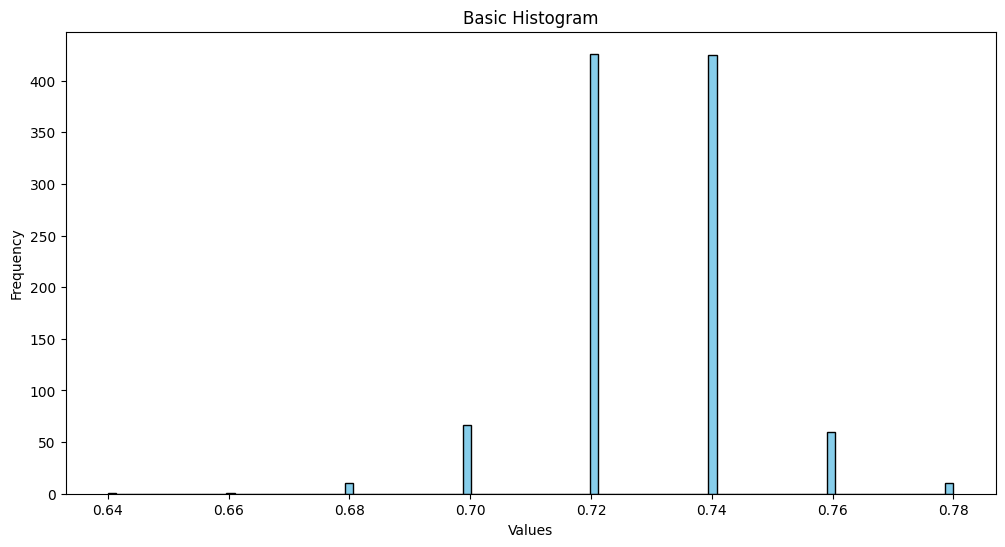

In [1209]:
print(size(acc))
plt.figure(figsize=(12, 6))
plt.hist(acc, bins=100, color='skyblue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()